This is the code that I will be adding to! Please feel free to fork/edit this : )

### Importing modules

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wave
from keras.preprocessing import image
from PIL import Image
%matplotlib inline


### Setting file locations

In [3]:
DATA_DIR = '/Users/E6EKI5G/Desktop/ASVspoof'  # Replace with your dataset path
REAL_DIR = os.path.join(DATA_DIR, 'real')
FAKE_DIR = os.path.join(DATA_DIR, 'fake')


In [4]:
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [5]:

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given

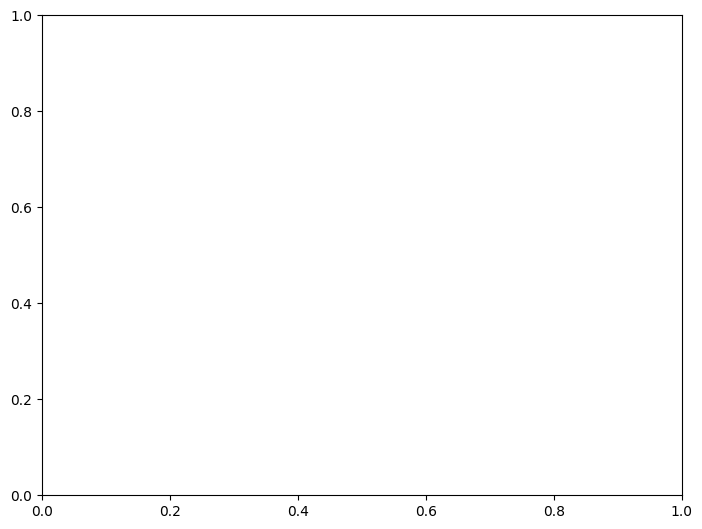

In [8]:
create_pngs_from_wavs('C:/Users/Farrell Joswara/Documents/GitHub/AI/data/test', 'Spectrograms/background')


# Prearing the dataset

In [ ]:
def is_valid_wav(file_path):
   try:
       with wave.open(file_path, 'r'):
           return True
   except wave.Error as e:
       print(f"File {file_path} is not a valid WAV file: {e}")
       return False
   
# Helper function to load and preprocess audio files
def load_audio(file_path, sr=SR):
   try:
       if not is_valid_wav(file_path):
           raise ValueError(f"File {file_path} is not a valid WAV file")
       audio, sr = librosa.load(file_path, sr=sr)
       return audio
   except (EOFError, ValueError, RuntimeError) as e:
       print(f"Error loading {file_path}: {e}")
       return None
# Helper function to extract MFCC features

def extract_features(file_path):
   audio = load_audio(file_path)
   if audio is None:
       return None
   mfccs = librosa.feature.mfcc(y=audio, sr=SR, n_mfcc=N_MFCC)
   if mfccs.shape[1] > MAX_LENGTH:
       mfccs = mfccs[:, :MAX_LENGTH]
   else:
       mfccs = np.pad(mfccs, ((0, 0), (0, MAX_LENGTH - mfccs.shape[1])), mode='constant')
   return mfccs
# Load dataset and extract features
def load_dataset(real_dir, fake_dir):
   X = []
   y = []
   real_files = glob.glob(os.path.join(real_dir, '*.wav'))
   fake_files = glob.glob(os.path.join(fake_dir, '*.wav'))
   for file in real_files:
       features = extract_features(file)
       if features is not None:
           X.append(features)
           y.append(0)  # 0 for real
   for file in fake_files:
       features = extract_features(file)
       if features is not None:
           X.append(features)
           y.append(1)  # 1 for fake
   X = np.array(X)
   y = np.array(y)
   return X, y
# Prepare data

In [ ]:
#load the dataset

In [ ]:
SR = 16000
N_MFCC = 40
MAX_LENGTH = 400  # Adjust based on your dataset
# Helper function to check if a file is a valid WAV file